In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # some imports to set up plotting
import seaborn as sns # pip install seaborn

import warnings
warnings.filterwarnings('ignore')

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [60]:
data = pd.read_csv("./flight_delays.csv")

In [61]:
data

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


Надо найти:

    -долю всех задержек ко всем вылетам done
    -зависимость количества задержек от длины пути, который предстоит пролететь самолёту done
    -топ 5 направлений, для которых чаще всего происходят задержки done
    -в какие времена года чаще всего происходят задержки рейсов done
    -топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы done
    -топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки done
    -необычную зависимость количества задержек от имеющихся данных done


In [10]:
delayed_part = data[data['dep_delayed_15min'] == 'Y'].shape[0] / data.shape[0]
print("доля всех задержек ко всем вылетам", delayed_part)

доля всех задержек ко всем вылетам 0.19044


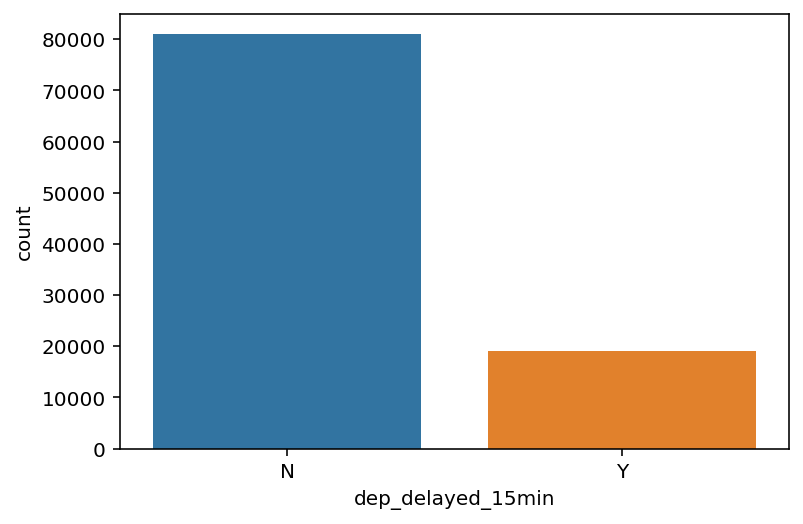

In [17]:
sns.countplot(x='dep_delayed_15min',  data=data);

зависимость количества задержек от длины пути, который предстоит пролететь самолёту


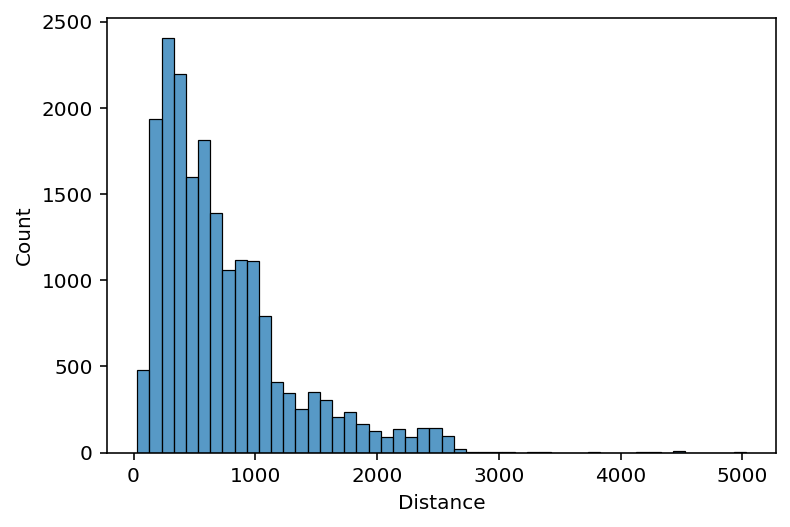

In [29]:
sns.histplot(data["Distance"][data["dep_delayed_15min"] == "Y"], binwidth=100)
print("зависимость количества задержек от длины пути, который предстоит пролететь самолёту")

In [63]:
data_sort_delays = data.groupby(["Origin", "Dest"]).count()

In [71]:
data_sort_delays = pd.DataFrame(data_sort_delays["dep_delayed_15min"])

In [45]:
print("топ 5 направлений, для которых чаще всего происходят задержки")
data_sort_delays.sort_values(by = "dep_delayed_15min" , ascending = False)[:5]


топ 5 направлений, для которых чаще всего происходят задержки


dep_delayed_15min
Origin Dest                   
SAN    LAX                 217
LAS    LAX                 186
LGA    ORD                 184
LAX    SAN                 182
       PHX                 181

<AxesSubplot:xlabel='Origin,Dest'>

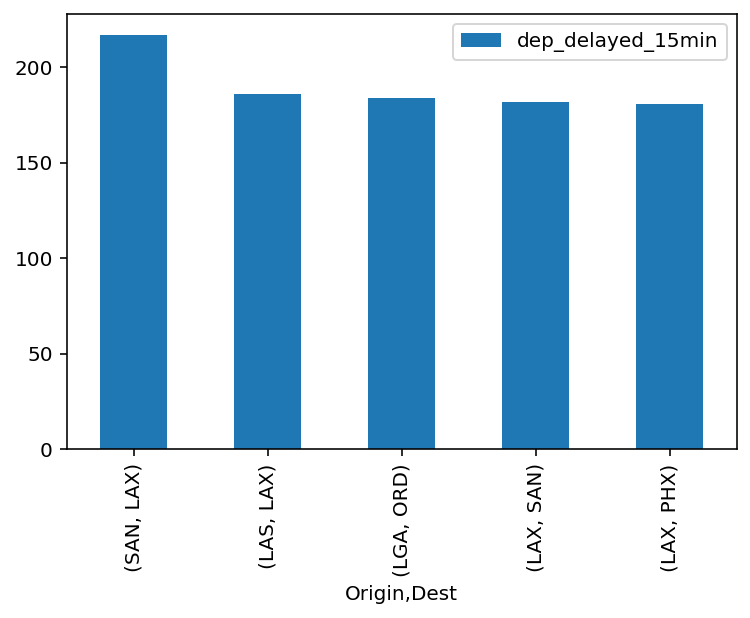

In [72]:
top_delays = data_sort_delays.sort_values(by = "dep_delayed_15min" , ascending = False)[:5]
top_delays.plot(kind = "bar")

In [98]:
data_season1 = pd.DataFrame(data["Month"])
data_season2 = pd.DataFrame(data["dep_delayed_15min"])
data_season = data_season1.join(data_season2, rsuffix='_other')
                              


,Month,dep_delayed_15min
0,c-8,N
1,c-4,N
2,c-9,N
3,c-11,N
4,c-10,Y
...,...,...
99995,c-5,N
99996,c-1,N
99997,c-1,N
99998,c-4,N


In [102]:
data_season["Season"] = np.nan

In [104]:
for i in range(100000) :
    if data_season["Month"][i] == "c-1" or data_season["Month"][i] == "c-2" or data_season["Month"][i] == "c-12":
        data_season["Season"][i] = "Winter"
    elif data_season["Month"][i] == "c-3" or data_season["Month"][i] == "c-4" or data_season["Month"][i] == "c-5":
        data_season["Season"][i] = "Spring"
    elif data_season["Month"][i] == "c-6" or data_season["Month"][i] == "c-7" or data_season["Month"][i] == "c-8":
        data_season["Season"][i] = "Summer"
    else:
        data_season["Season"][i] = "Fall"

In [105]:
data_season

,Month,dep_delayed_15min,Season
0,c-8,N,Summer
1,c-4,N,Spring
2,c-9,N,Fall
3,c-11,N,Fall
4,c-10,Y,Fall
...,...,...,...
99995,c-5,N,Spring
99996,c-1,N,Winter
99997,c-1,N,Winter
99998,c-4,N,Spring


In [107]:
data_season_count = data_season.groupby(["Season"]).count()

In [110]:
del data_season_count["Month"]

<AxesSubplot:xlabel='Season'>

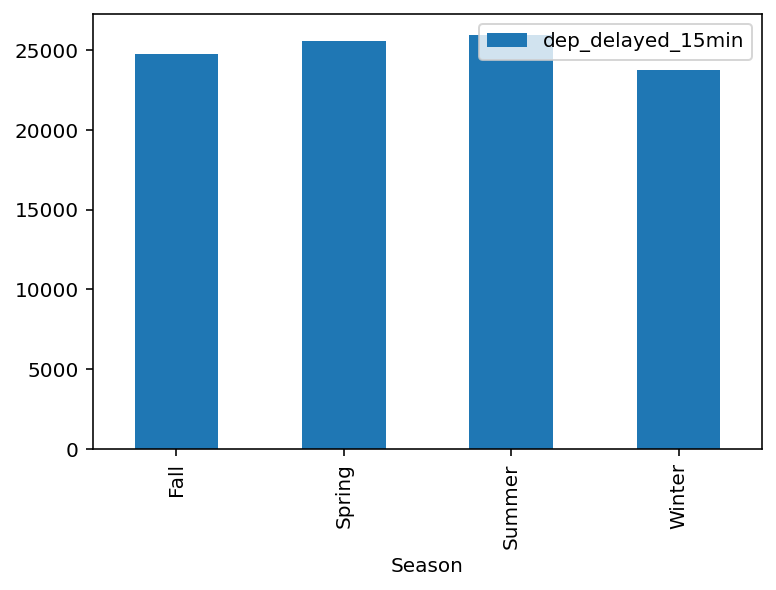

In [111]:
data_season_count.plot(kind='bar')

In [117]:
print("чаще всего происходят задержки рейсов летом и весной")
data_season_count.sort_values(by = 'dep_delayed_15min', ascending = False)

чаще всего происходят задержки рейсов летом и весной


,dep_delayed_15min
Season,
Summer,25950
Spring,25546
Fall,24746
Winter,23758


In [130]:
data_best_carrier = data.groupby(["UniqueCarrier", "dep_delayed_15min"]).count()


In [132]:
data_best_carrier = pd.DataFrame(data_best_carrier["Origin"])


In [140]:
data_best_carrier.head()

Origin
UniqueCarrier dep_delayed_15min        
AA            N                    7648
              Y                    1770
AQ            N                     216
              Y                      18
AS            N                    1681

In [157]:
condition = data_best_carrier.index.get_level_values( 'dep_delayed_15min').isin(['N'])
data_best_carrier[condition].sort_values(by = "Origin", ascending = False)[:10]

,,Origin
UniqueCarrier,dep_delayed_15min,
WN,N,11863
AA,N,7648
DL,N,6755
OO,N,6113
MQ,N,5995
UA,N,5554
US,N,5397
NW,N,5328
XE,N,4875


In [158]:
condition = data_best_carrier.index.get_level_values( 'dep_delayed_15min').isin(['Y'])
data_best_carrier[condition].sort_values(by = "Origin", ascending = True)[:10]

,,Origin
UniqueCarrier,dep_delayed_15min,
AQ,Y,18
HA,Y,33
TZ,Y,64
DH,Y,156
F9,Y,156
HP,Y,196
B6,Y,393
YV,Y,478
AS,Y,541


In [159]:
data_delays_by_carrier = data[data['dep_delayed_15min'] == 'Y'].groupby('UniqueCarrier').aggregate({'dep_delayed_15min':'count'})

In [162]:
data_flights_by_carrier = data.groupby('UniqueCarrier').aggregate({'dep_delayed_15min':'count'})
data_delays_by_carrier = data_delays_by_carrier/data_flights_by_carrier

<AxesSubplot:xlabel='UniqueCarrier'>

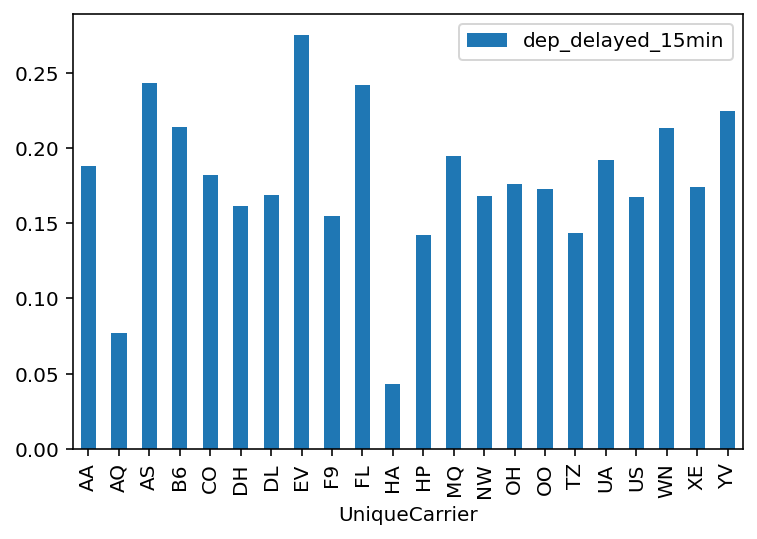

In [164]:
data_delays_by_carrier.plot(kind = "bar")

<AxesSubplot:xlabel='UniqueCarrier'>

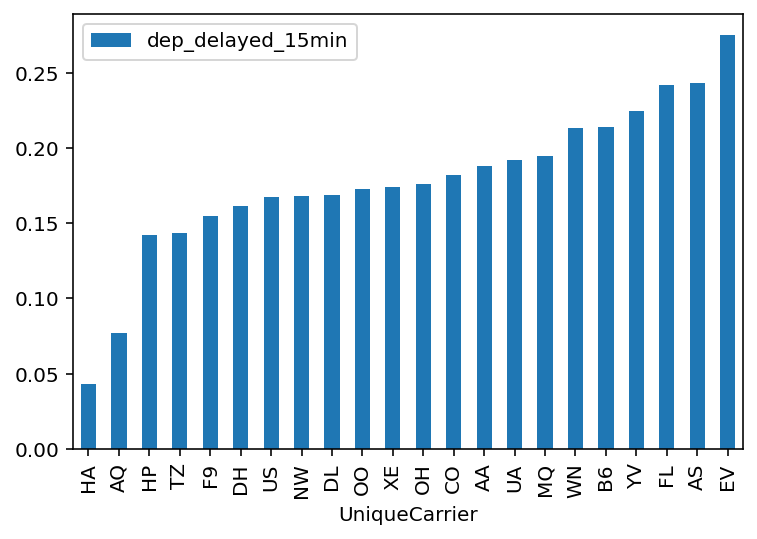

In [171]:
data_delays_by_carrier.sort_values(by = 'dep_delayed_15min', ascending = True).plot(kind = "bar")


In [169]:
print("топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы")
data_delays_by_carrier.sort_values(by = 'dep_delayed_15min', ascending = True)[:10]

топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы


,dep_delayed_15min
UniqueCarrier,
HA,0.043307
AQ,0.076923
HP,0.142235
TZ,0.143498
F9,0.155070
DH,0.161491
US,0.167387
NW,0.167890
DL,0.168922


In [170]:
print("топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки")
data_delays_by_carrier.sort_values(by = 'dep_delayed_15min', ascending = False)[:10]

топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки


,dep_delayed_15min
UniqueCarrier,
EV,0.275318
AS,0.243474
FL,0.242185
YV,0.224624
B6,0.213819
WN,0.213433
MQ,0.194545
UA,0.192263
AA,0.187938


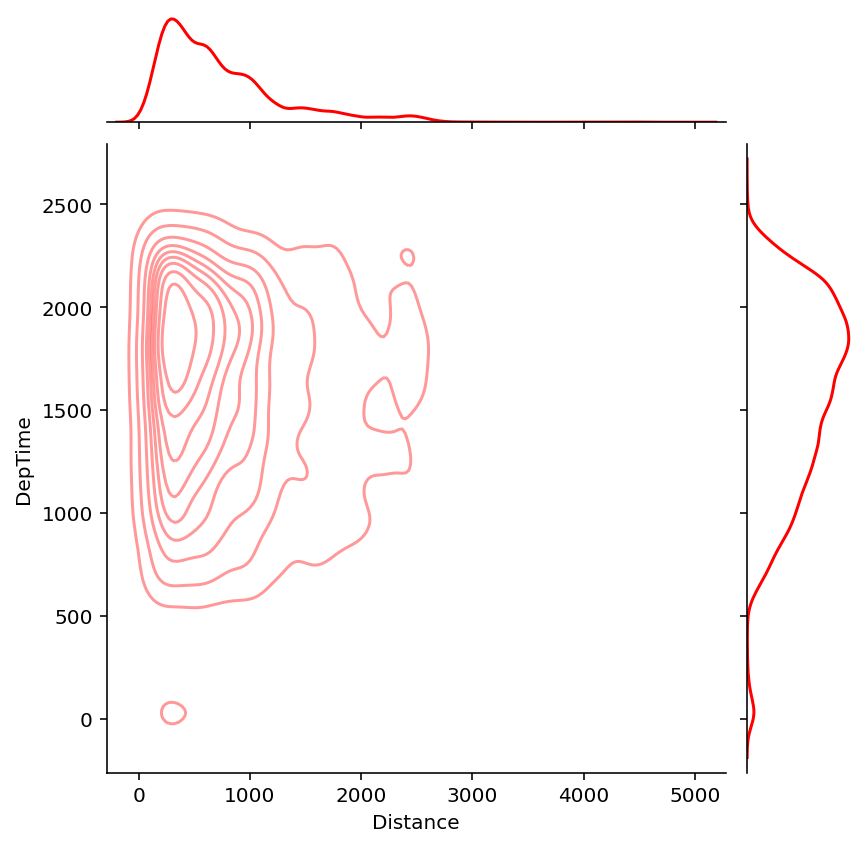

In [82]:
sns.jointplot('Distance', 'DepTime',  data=data[data['dep_delayed_15min'] == 'Y'], kind = "kde", color="r", alpha = 0.4, legend = "number of delayed flights")

необычная зависимость количества задержек от имеющихся данных -> больше всего задержек для полетов, вылетающих вечером на небольшие дистанции

In [53]:
data.sort_values(by = 'DayOfWeek', ascending = True)



,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
66974,12,,1,710,OH,BDL,RSW,1180,N
12460,3,,1,709,US,TPA,DCA,814,N
88088,6,,1,915,AA,COS,DFW,592,Y
25532,4,,1,1334,UA,SEA,IAD,2306,Y
75294,3,,1,1057,OO,LAX,SAN,109,N
...,...,...,...,...,...,...,...,...,...
76084,5,,7,853,DH,PIT,IAD,183,N
76081,10,,7,654,AS,ANC,SEA,1449,N
76079,9,,7,1402,DL,ATL,IND,432,N
76099,10,,7,740,OO,PDX,SLC,630,N


In [14]:
data

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,20,c-3,1548,US,PIT,MCO,834,N
2,c-9,2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,c-5,4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,27,c-4,1515,MQ,DFW,GGG,140,N


In [62]:
data["DayofMonth"] = data["DayofMonth"].str[2:]


In [78]:
data = data.astype({"DayofMonth":int})

In [79]:
data = data.sort_values(by = "DayofMonth")

In [73]:
pd.unique(data.DayofMonth)

array(['21', '20', '2', '25', '7', '3', '27', '29', '28', '5', '6', '10',
       '19', '26', '14', '22', '9', '31', '4', '16', '18', '30', '1',
       '24', '15', '17', '8', '12', '13', '11', '23'], dtype=object)

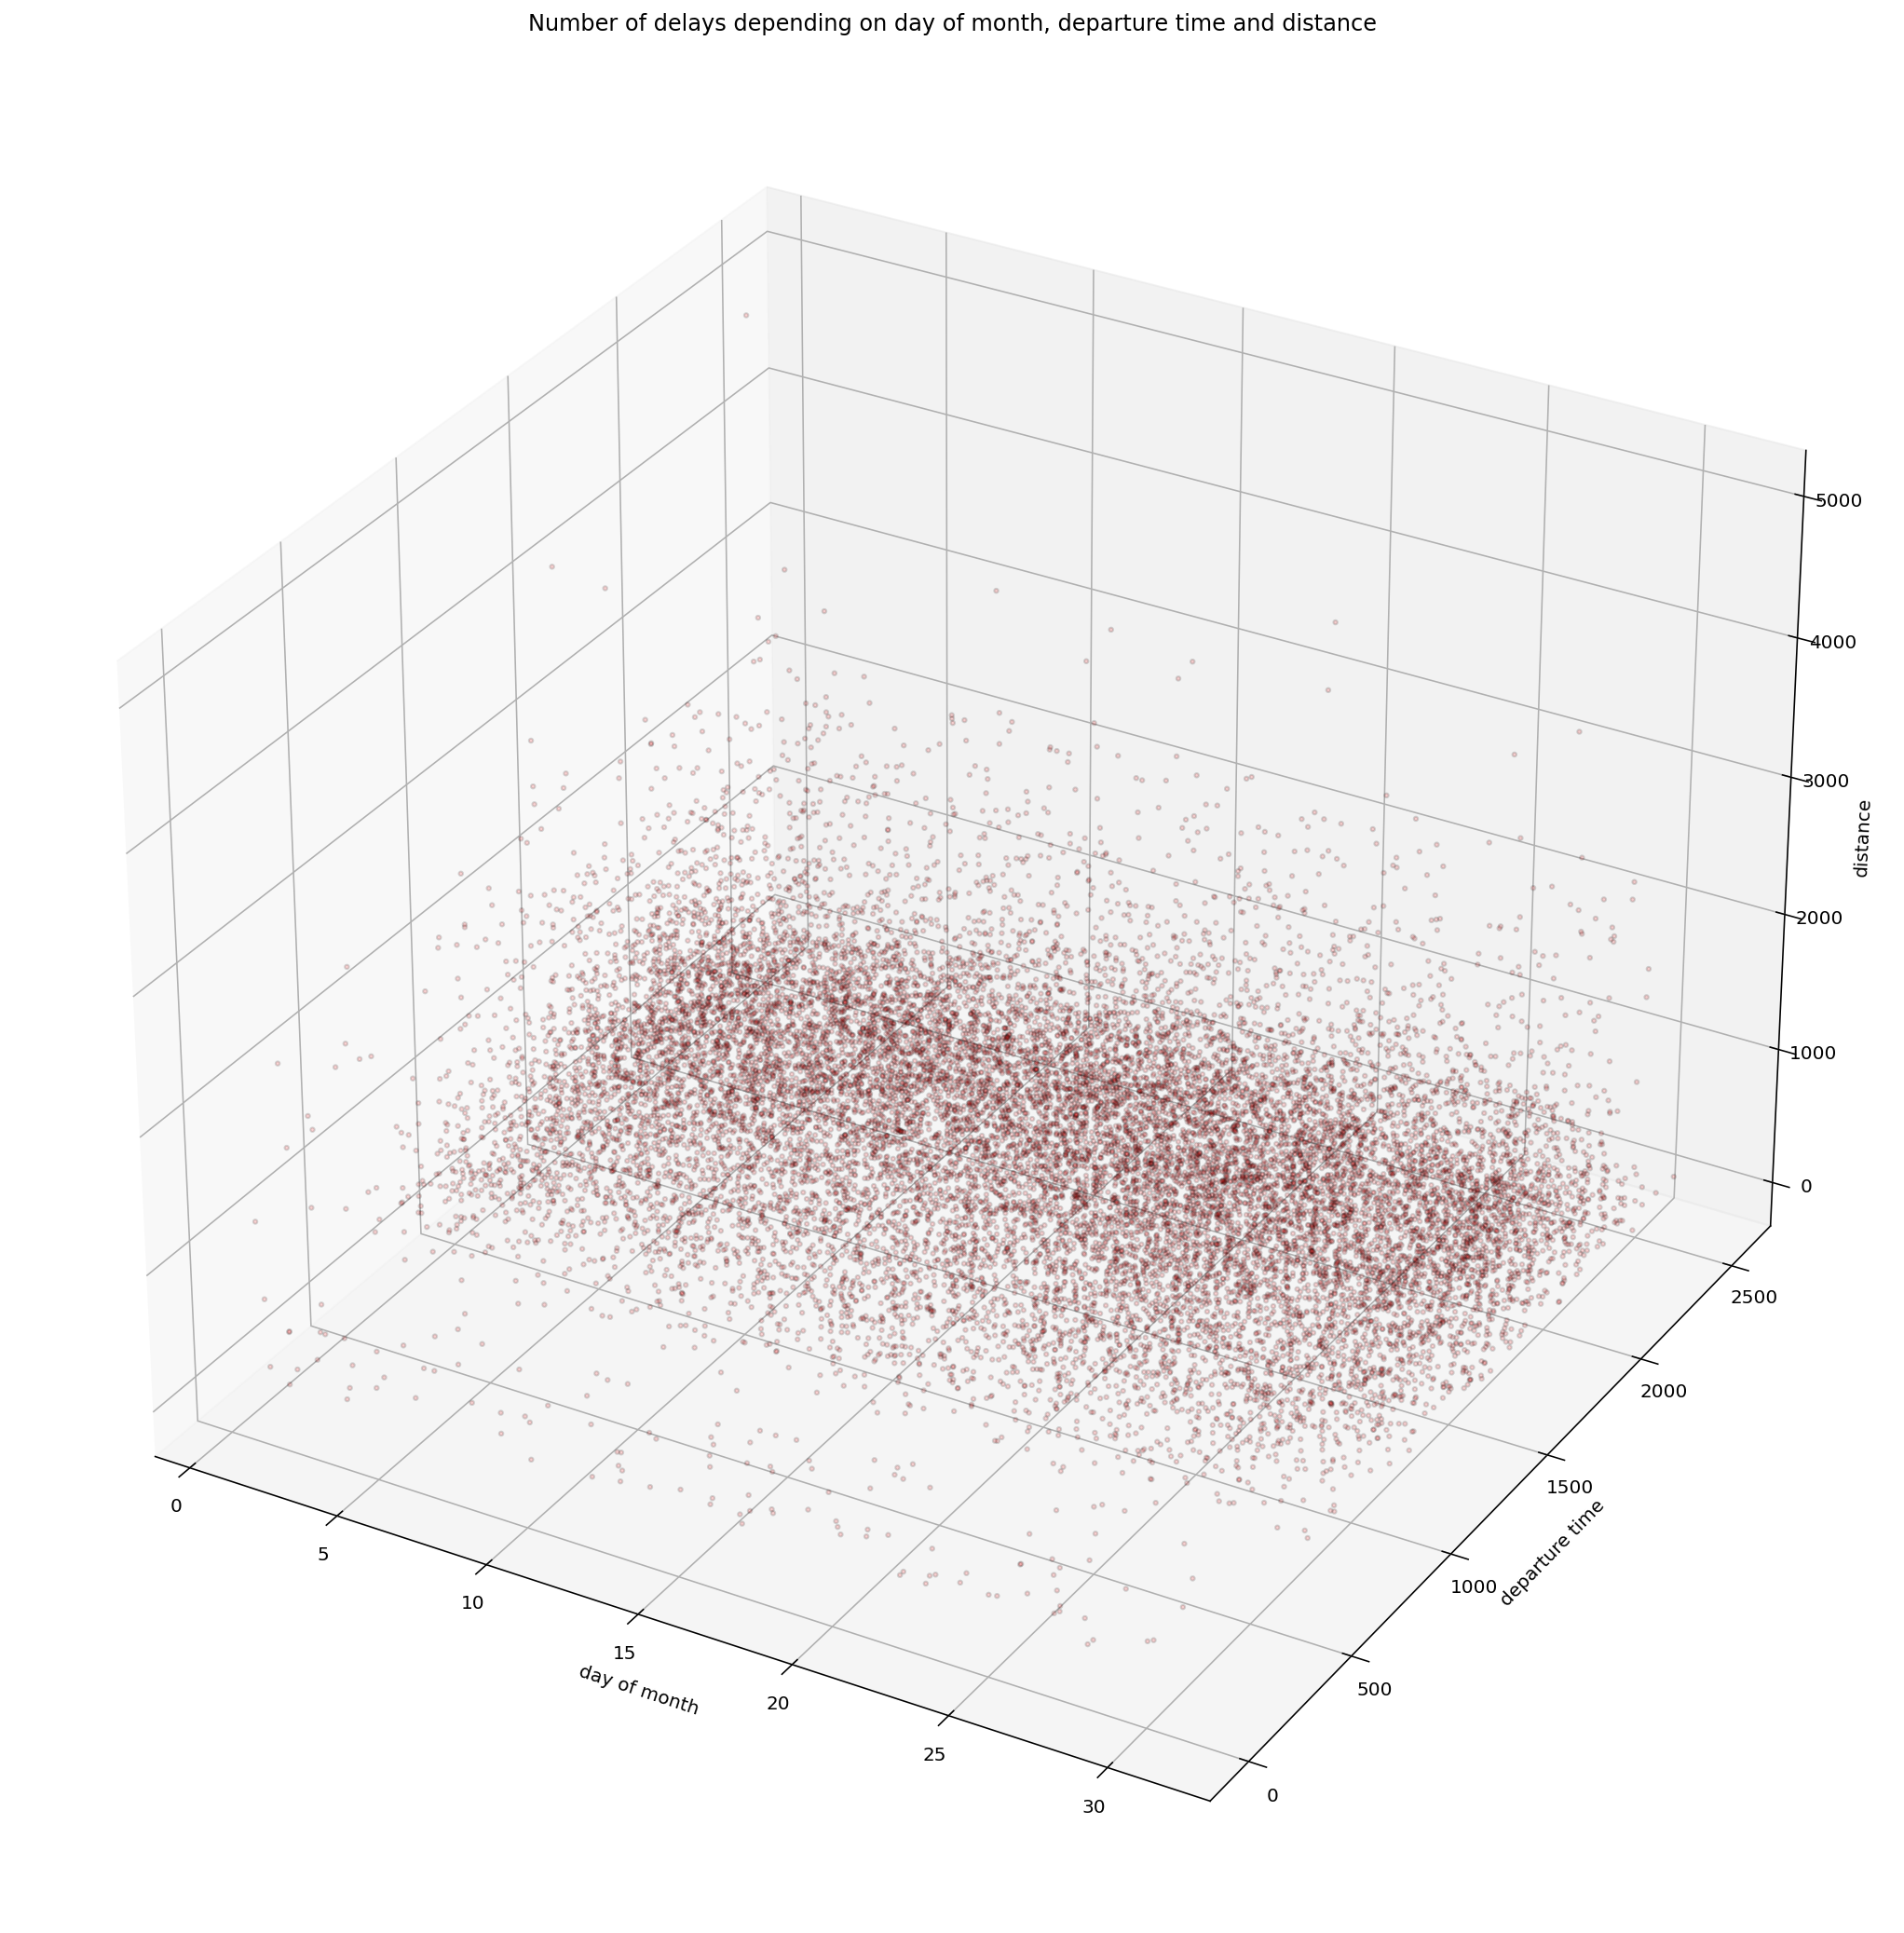

In [80]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(20, 14))
ax = Axes3D(fig)
ax.scatter(data[data['dep_delayed_15min'] == 'Y']["DayofMonth"],  data[data['dep_delayed_15min'] == 'Y']["DepTime"],  data[data['dep_delayed_15min'] == 'Y']["Distance"], cmap=plt.cm.Set1, edgecolor='k',color = 'red', s=5, alpha = 0.15)

ax.set_title("Number of delays depending on day of month, departure time and distance")
ax.set_xlabel("day of month")
#ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("departure time")
#ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("distance")
#ax.w_zaxis.set_ticklabels([])
plt.show()